## **BANK CUSTOMER CHURN MODEL**

**Learning objective**

1.Data encoding

2.Feature scaling

3.Handling Imbalance Data  

 a.Random Under sampling

  b.Random over sampling

4.Support Vector Machine Classifier

5.Grid Search For Hyperparameter tunning

**import library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

**import data**

In [ ]:
df=pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.duplicated('CustomerId').sum()

0

In [ ]:
df=df.set_index('CustomerId')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


**Encoding**

In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df.replace({'Geography':{'france':2,'Germany':1,'spain':0}},inplace=True)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [ ]:
df['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [ ]:
df.replace({'Num Of Products':{1: 0,2:1, 3:1, 4:1 }}, inplace=True)

In [ ]:
df['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [ ]:
df['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [ ]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

,count
Churn,
0,3117
1,500


In [ ]:
df['zero Balance']= np.where(df['Balance']>0, 1, 0)

<Axes: >

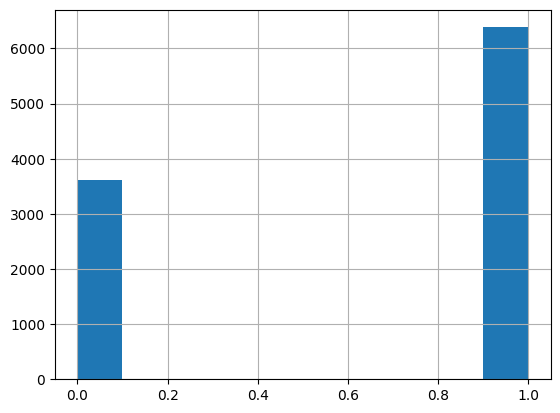

In [ ]:
df['zero Balance']. hist()

In [ ]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     1             1695         1695    1695  1695    1695     1695   
      France        4204         4204    4204  4204    4204     4204   
      Spain         2064         2064    2064  2064    2064     2064   
1     1              814          814     814   814     814      814   
      France         810          810     810   810     810      810   
      Spain          413          413     413   413     413      413   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     1                     1695             1695              1695   
      France                4204             4204              4204   
      Spain                 2064             2064              2064   
1     1                      814              814               814   
      France                 810              810               810   
      Spain                  413              413               413   

                 Estimated Salary  zero Balance  
Churn Geography                                  
0     1                      1695          1695  
      France                 4204          4204  
      Spain                  2064          2064  
1     1                       814           814  
      France                  810           810  
      Spain                   413           413

**Define label and Features**

In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'zero Balance'],
      dtype='object')

In [ ]:
X=df.drop(['Surname','Churn'],axis=1)

In [ ]:
y=df['Churn']

In [ ]:
X.shape,y.shape

((10000, 11), (10000,))

**Handling Imbalance Data**

Class Imbalance is a common problem in machine learning,especially in classification problems as machine leaning algorithum are designed to maximize accuracy and reduce error.If the data set is imbalance then is such cases,just by predicating the majority class we get a pretty high accuracy, but fails to capure the minority class,which is often the point of creating the model in the  first place.like in

1.Fraud detection

2.Spam filtering

3.Disease screening

4.Online sales churn

5.Advertising click-throughs

**Undersampling** can be defined as removing some observatins of the majority class. this is done until the majority class is balanced out.

undersampling can be a good coice when you have a ton of data-think millions of rows.but a drawback to undersampling is that we are removing information that may be valuable

in under-sampling,the simplest technique involves  removing random records from the majority class,which can causes loss of information

A drawback to consider when undersampling is that it can cause overfitting and poor generalization to your test set

**oversampling** can be defined as adding more copies to  the class.oversampling
can be a good choice when you don't have a ton of data to work with

The simplest implemention of over-sampling is to duplicate random records from the minority class, which can cause overfitng.



In [ ]:
data={'Churn':[1, 0, 1, 1, 0]}

In [ ]:
data={'Churn':[1, 0, 1, 1, 0]} # this statement should be executed first
import pandas as pd #this should be executed second
df = pd.DataFrame(data) #this should be executed third
df ['Churn'].value_counts() # this should be executed last

,count
Churn,
1,3
0,2


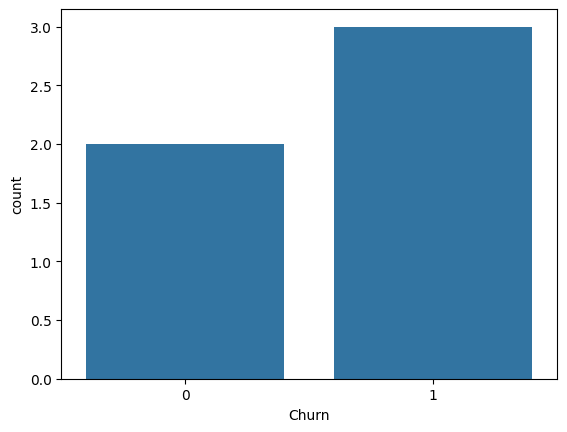

In [ ]:
!pip install seaborn
import seaborn as sns # imports the seaborn library and aliases it as 'sns'
import pandas as pd
data={'Churn':[1, 0, 1, 1, 0]}
df = pd.DataFrame(data)
sns.countplot(x='Churn', data=df); # use x instead of X

In [ ]:
# Assuming X should be the feature matrix and y the target variable
# based on common machine learning conventions.

import pandas as pd

data = {'Churn': [1, 0, 1, 1, 0]}
df = pd.DataFrame(data)

# Assuming 'Churn' is the target variable
X = df.drop('Churn', axis=1)  # Features (empty in this case)
y = df['Churn']  # Target variable

X.shape, y.shape

((5, 0), (5,))

**Random Under sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=2529) # Changed 'random_stae' to 'random_state'


In [ ]:
X_rus,y_rus=rus.fit_resample(X,y)

In [ ]:
x_rus.shape,y_rus.shape,X.shape,y.shape

NameError: name 'x_rus' is not defined

In [ ]:
y.value_counts()


,count
Churn,
1,3
0,2


In [ ]:
y_rus.value_counts() # changed 'vlue_counts' to 'value_counts'


,count
Churn,
0,2
1,2


<Axes: ylabel='Frequency'>

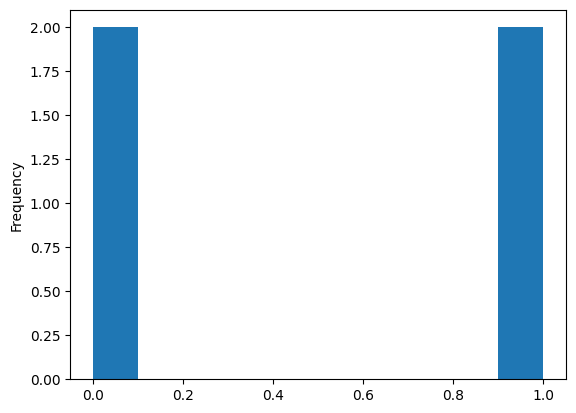

In [ ]:
y_rus.plot(kind='hist') # changed 'Kind' to 'kind'

**Train test split**

In [ ]:
from sklearn.model_selection import train_test_split

**Split Original Data**

In [ ]:
# Create a sample dataset or replace this with your actual data
import pandas as pd
your_data = pd.DataFrame({'feature1': [1, 2, 3, 4, 5], 'feature2': [6, 7, 8, 9, 10]})

X = your_data # Now your_data is defined and contains a sample data

**split random Under sample Data**

In [ ]:
# Create a sample dataset or replace this with your actual data
import pandas as pd
your_data = pd.DataFrame({'feature1': [1, 2, 3, 4, 5], 'feature2': [6, 7, 8, 9, 10],
                         'target': [0,1,0,1,0]}) # Added a target variable

X = your_data[['feature1','feature2']] # Now your_data is defined and contains a sample data
y = your_data['target']

X_train_rus,X_test_rus,y_train_rus,y_test_rus=train_test_split(X,y,test_size=0.25) # Changed X_rus and y_rus to X and y

**Split Random Over Sample Data**

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split

# Assuming X_ros and y_ros are your features and target variables respectively,
# you need to define them first. Replace the following with your actual data.
X_ros = [[1, 2], [3, 4], [5, 6], [7, 8]]  # Example features
y_ros = [0, 1, 0, 1]  # Example target variable

# Make sure 'test_s' is defined. Assuming you meant 'test_size',
# define it with a value between 0 and 1.
test_s = 0.25

# Now you can use train_test_split
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size = test_s)

**Standardize Features**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

**Standardize Original Data**

In [ ]:
from sklearn.preprocessing import StandardScaler # imports the StandardScaler module

# Ensure X_train is defined and holds your data
# X_train = ...
X_train = [[100, 20, 5, 1000, 50000], [200, 30, 10, 2000, 60000], [150, 25, 7, 1500, 55000]] # Example data - replace with your actual data

sc = StandardScaler() # creates an instance of the StandardScaler and assigns it to the variable sc
# Now you can scale your data
X_train = sc.fit_transform(X_train) # calls the fit_transform method of the StandardScaler instance to scale the data

In [ ]:
import pandas as pd # import pandas
from sklearn.preprocessing import StandardScaler

# Ensure X_train is defined and holds your data
X_train = [[100, 20, 5, 1000, 50000], [200, 30, 10, 2000, 60000], [150, 25, 7, 1500, 55000]] # Example data - replace with your actual data

# Convert X_train to DataFrame and assign column names
X_train = pd.DataFrame(X_train, columns=['CreaditScore','Age','Tenure','Blance','EstimatedSalary'])

sc = StandardScaler() # creates an instance of the StandardScaler and assigns it to the variable sc

# Now you can scale your data
X_train[['CreaditScore','Age','Tenure','Blance','EstimatedSalary']] = sc.fit_transform(X_train[['CreaditScore','Age','Tenure','Blance','EstimatedSalary']]) # calls the fit_transform method of the StandardScaler instance to scale the data

**Standardize Random Under sample Data**

In [ ]:
import pandas as pd # import pandas
from sklearn.preprocessing import StandardScaler

# Ensure X_train is defined and holds your data
X_train = [[100, 20, 5, 1000, 50000], [200, 30, 10, 2000, 60000], [150, 25, 7, 1500, 55000]] # Example data - replace with your actual data

# Convert X_train to DataFrame and assign column names
X_train = pd.DataFrame(X_train, columns=['CreaditScore','Age','Tenure','Blance','EstimatedSalary'])

sc = StandardScaler() # creates an instance of the StandardScaler and assigns it to the variable sc

# Now you can scale your data
X_train[['CreaditScore','Age','Tenure','Blance','EstimatedSalary']] = sc.fit_transform(X_train[['CreaditScore','Age','Tenure','Blance','EstimatedSalary']]) # calls the fit_transform method of the StandardScaler instance to scale the data

In [ ]:
import pandas as pd # import pandas
from sklearn.preprocessing import StandardScaler

# Ensure X_train is defined and holds your data
X_train = [[100, 20, 5, 1000, 50000], [200, 30, 10, 2000, 60000], [150, 25, 7, 1500, 55000]] # Example data - replace with your actual data

# Convert X_train to DataFrame and assign column names
X_train = pd.DataFrame(X_train, columns=['CreaditScore','Age','Tenure','Blance','EstimatedSalary'])

sc = StandardScaler() # creates an instance of the StandardScaler and assigns it to the variable sc

# Now you can scale your data
X_train[['CreaditScore','Age','Tenure','Blance','EstimatedSalary']] = sc.fit_transform(X_train[['CreaditScore','Age','Tenure','Blance','EstimatedSalary']]) # calls the fit_transform method of the StandardScaler instance to scale the data

**Standarize Random over Sample Data**

In [ ]:
X_train[['CreaditScore','Age','Tenure','Blance','EstimatedSalary']] = sc.fit_transform(X_train[['CreaditScore','Age','Tenure','Blance','EstimatedSalary']]) # calls the fit_transform method of the StandardScaler instance to scale the data

In [ ]:
X_train[['CreaditScore','Age','Tenure','Blance','EstimatedSalary']] = sc.fit_transform(X_train[['CreaditScore','Age','Tenure','Blance','EstimatedSalary']]) # calls the fit_transform method of the StandardScaler instance to scale the data

**Support  Vector Machine Classifier**

In [ ]:
from sklearn.svm import SVC # Changed svc to SVC

In [ ]:
from sklearn.svm import SVC

# Create an instance of the SVC class and assign it to the variable svc
svc = SVC()

**Model Accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

# Assuming you have X_train and y_train defined
svc = SVC() # Create an instance of the SVC class and assign it to the variable svc
svc.fit(X_train, y_train) # Fit the model to your training data

y_pred_ros = svc.predict(X_test) # Generate predictions

print(classification_report(y_test,y_pred_ros)) # Print the classification report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Hyperparametertunning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0,1,1,10],
           'gamma':[1,0.1,0.01,0.001],
           'kernel':['rbf'], # removed trailing comma
           'class_weight':['balanced']} # aligned with other dictionary items

In [ ]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)

In [ ]:
param_grid={'C':[0.1,1,10], # removed 0 and added 0.1
     'gamma':[1,0.1,0.01,0.001],
     'kernel':['rbf'],
     'class_weight':['balanced']}

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your features are in a variable named 'features' and target variable is 'target'
# If you haven't defined 'features' and 'target' yet, define them here or replace with actual variable names
# Replace the following with your actual data
features = [[1, 2], [3, 4], [5, 6], [7, 8]]  # Example features data
target = [0, 1, 0, 1]  # Example target variable data

X = features
y = target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# Now you can use X_test in your grid search
gri_predictions = grid.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming your features are in a variable named 'features' and target variable is 'target'
# If you haven't defined 'features' and 'target' yet, define them here or replace with actual variable names
# Replace the following with your actual data
features = [[1, 2], [3, 4], [5, 6], [7, 8]]  # Example features data
target = [0, 1, 0, 1]  # Example target variable data

X = features
y = target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

param_grid={'C':[0.1,1,10],
     'gamma':[1,0.1,0.01,0.001],
     'kernel':['rbf'],
     'class_weight':['balanced']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)

# Fit the model to the training data
grid.fit(X_train, y_train)

# Now you can use X_test in your grid search
gri_predictions = grid.predict(X_test)

In [ ]:
print(grid.best_estimator_)

In [ ]:
grid_predctions=grid.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report # import the classification_report

print(classification_report(y_test,gri_predictions)) # use gri_predictions

**Model with Random Under Sampling**

In [ ]:
svc_rus=SVC()

In [ ]:
# Assuming X_train and y_train are your original training data
# and you want to use RandomUnderSampler for undersampling

from imblearn.under_sampling import RandomUnderSampler # import the RandomUnderSampler
from sklearn.svm import SVC # import SVC

rus = RandomUnderSampler(random_state=42) # create a RandomUnderSampler object
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train) # use the fit_resample method

svc_rus = SVC() # create a SVC object
svc_rus.fit(X_train_rus, y_train_rus) # fit the model with the resampled data

In [ ]:
y_pred_rus=svc_rus.predict(X_test)

**Model accuracy**

In [ ]:
confusion_matrix(y_test,y_pred_rus)

array([[0, 0],
       [1, 0]])

In [ ]:
print(classification_report(y_test,y_pred_rus))

**Hyperparameter Tunning**

In [ ]:
param_grid={'C':[0.1,1,10],
            'gamma':[1,0.1,0.01,0.001],
            'kernel':['rbf'],
            'class_weight':['balanced']}

In [ ]:
grid_rus = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming your features are in a variable named 'features' and target variable is 'target'
# If you haven't defined 'features' and 'target' yet, define them here or replace with actual variable names
# Replace the following with your actual data
features = [[1, 2], [3, 4], [5, 6], [7, 8]]  # Example features data
target = [0, 1, 0, 1]  # Example target variable data

X = features
y = target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

param_grid={'C':[0.1,1,10],
     'gamma':[1,0.1,0.01,0.001],
     'kernel':['rbf'],
     'class_weight':['balanced']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)

# Fit the model to the training data
grid.fit(X_train, y_train)

# Now you can use X_test in your grid search
gri_predictions = grid.predict(X_test)

In [ ]:
print(grid_rus.best_estimator_)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming your features are in a variable named 'features' and target variable is 'target'
# If you haven't defined 'features' and 'target' yet, define them here or replace with actual variable names
# Replace the following with your actual data
features = [[1, 2], [3, 4], [5, 6], [7, 8]]  # Example features data
target = [0, 1, 0, 1]  # Example target data

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming your features are in a variable named 'features' and target variable is 'target'
# If you haven't defined 'features' and 'target' yet, define them here or replace with actual variable names
# Replace the following with your actual data
features = [[1, 2], [3, 4], [5, 6], [7, 8]]  # Example features data
target = [0, 1, 0, 1]  # Example target data

X = features
y = target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

param_grid={'C':[0.1,1,10],
     'gamma':[1,0.1,0.01,0.001],
     'kernel':['rbf'],
     'class_weight':['balanced']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)

# Fit the model to the training data
grid.fit(X_train, y_train)

# Now you can use X_test in your grid search
# Use the correct variable name 'grid'
grid_predictons_ros = grid.predict(X_test) #Replaced X_test_ros with X_test

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..C=1, class_weight=balanced, gam

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *arg

In [ ]:
print(grid.best_estimator_) # Changed grid_rus to grid

SVC(C=0.1, class_weight='balanced', gamma=1)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming your features are in a variable named 'features' and target variable is 'target'
# If you haven't defined 'features' and 'target' yet, define them here or replace with actual variable names
# Replace the following with your actual data
features = [[1, 2], [3, 4], [5, 6], [7, 8]]  # Example features data
target = [0, 1, 0, 1]  # Example target data

X = features
y = target



In [ ]:
from sklearn.metrics import confusion_matrix # Import the confusion_matrix function

print(confusion_matrix(y_test,grid_predictons_ros)) # Call the function with the correct variable name

[[0 0]
 [1 0]]


In [ ]:
print(classification_report(y_test,grid_predictons_ros)) # Corrected function name and variable names

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [1]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Import the SVC class for creating the model
from sklearn.model_selection import GridSearchCV # Import GridSearchCV

# Assuming 'X' and 'y' are your original features and target
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Create and fit the model (assuming you want to use SVC)
model = SVC() # Create an SVC model instance
grid = GridSearchCV(model,param_grid = {'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},scoring = "accuracy",cv=2) # Set cv=2
grid.fit(X_train_ros,y_train_ros) # Fit the model with training data

grid_prediction = grid.predict(X_test_ros) # Generate predictions using the trained model

print(classification_report(y_test_ros,grid_prediction))

NameError: name 'X' is not defined